## ECO-7026A Summative Assessment 1, 2022/23

These are model and annotated solutions for this assessment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import our core decisions data to get started!

In [2]:
df = pd.read_csv("choices.csv")
df

,sessionid,treatmentnumber,subjects,period,subject,group,profit,numberingroup,comp0,comp1,...,timecontinueshowprofitcondok,session,interiorfirst,subsfirst,max_linear,max_comp,max_inter,min_inter,max_subs,timecontrolquestions
0,160412_1143,1,subjects,1,1,1,19.719999,1,0,0,...,99999,1,0,0,10,19,16,4,19,68
1,160412_1143,1,subjects,1,2,1,18.260000,2,18,17,...,0,1,0,0,13,18,16,2,16,253
2,160412_1143,1,subjects,1,3,1,19.400000,3,6,6,...,0,1,0,0,8,13,9,9,11,56
3,160412_1143,1,subjects,1,4,1,19.299999,4,8,8,...,0,1,0,0,10,10,9,7,9,237
4,160412_1143,1,subjects,1,5,2,22.980000,1,5,6,...,99999,1,0,0,12,14,12,4,14,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,160516_1238,1,subjects,1,144,4,32.799999,4,5,5,...,0,8,1,1,8,11,20,7,10,47
144,160516_1238,1,subjects,1,145,5,25.200001,1,5,5,...,0,8,1,1,5,17,18,6,19,54
145,160516_1238,1,subjects,1,146,5,22.200001,2,5,4,...,99999,8,1,1,18,14,18,0,16,70
146,160516_1238,1,subjects,1,147,5,15.200000,3,10,10,...,0,8,1,1,14,14,20,0,14,89


### Question 1

The dataset consists of one row per each participant.  To count the participants per session, we just need to groupby the `sessionid`, and report the number of observations (e.g. the `subject` column) for each group.

In [3]:
df.groupby("sessionid")[['subject']].count()

,subject
sessionid,
160412_1143,20
160425_1139,20
160425_1354,12
160428_1441,20
160505_1026,16
160505_1253,20
160516_1039,20
160516_1238,20


### Question 2

The most straightforward way to create a histogram plot is using `plt.hist` from `pyplot`.

Out of the box, the histogram chunks data into 10 bins.  To make a quality histogram you should specify the bins.
In our case, we would want each contribution level to have its own bin.  But, we also want each bin to be centered on the corresponding number.  To do this, offset the bin cutoffs by one-half.

Text(0, 0.5, 'Number of participants')

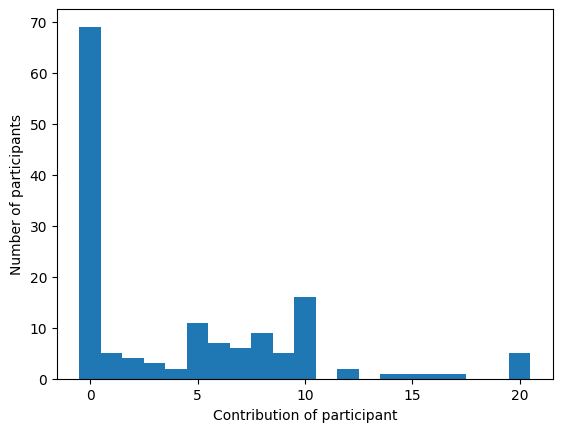

In [4]:
plt.hist(df['ulinear'], bins=[i-0.5 for i in range(22)], align='mid')
plt.xlabel("Contribution of participant")
plt.ylabel("Number of participants")

### Question 3a

The variable `female` is contained in the demographics file.  So, we augment our dataset by merging.

`demographics.csv` contains both `sessionid` and `subject`.  We merge using both of those as merge keys.  In this example we'll merge all the demographics - but you could also use the `usecols` argument of `pd.read_csv` and load only the columns you actually need, which would be helpful if you were working with larger datasets.

In [5]:
df = df.merge(pd.read_csv("demographics.csv"), how='left', on=['sessionid', 'subject'])
df

,sessionid,treatmentnumber,subjects,period,subject,group,profit,numberingroup,comp0,comp1,...,min_inter,max_subs,timecontrolquestions,female,age,uk,other_europe,america,asia_russia,africa
0,160412_1143,1,subjects,1,1,1,19.719999,1,0,0,...,4,19,68,0,20,1,0,0,0,0
1,160412_1143,1,subjects,1,2,1,18.260000,2,18,17,...,2,16,253,1,18,0,0,0,1,0
2,160412_1143,1,subjects,1,3,1,19.400000,3,6,6,...,9,11,56,0,20,1,0,0,0,0
3,160412_1143,1,subjects,1,4,1,19.299999,4,8,8,...,7,9,237,1,20,0,0,0,0,1
4,160412_1143,1,subjects,1,5,2,22.980000,1,5,6,...,4,14,144,0,19,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,160516_1238,1,subjects,1,144,4,32.799999,4,5,5,...,7,10,47,0,19,1,0,0,0,0
144,160516_1238,1,subjects,1,145,5,25.200001,1,5,5,...,6,19,54,1,23,1,0,0,0,0
145,160516_1238,1,subjects,1,146,5,22.200001,2,5,4,...,0,16,70,1,20,0,1,0,0,0
146,160516_1238,1,subjects,1,147,5,15.200000,3,10,10,...,0,14,89,1,20,1,0,0,0,0


To answer 3(a), the simplest solution would be just to use `.describe()` on the "ulinear" column - which provides mean and standard deviation as well as a few other descriptive statistics:

In [6]:
df.groupby('female')[['ulinear']].describe()

ulinear                                              
         count      mean       std  min  25%  50%  75%   max
female                                                      
0         65.0  3.676923  4.968990  0.0  0.0  0.0  7.0  20.0
1         83.0  4.734940  5.428211  0.0  0.0  4.0  8.5  20.0

Equally, you could use `.agg()` to aggregate, specifying that you want both the `mean` and `std` of the variable `ulinear` by groups:

In [7]:
df.groupby('female')[['ulinear']].agg(['mean', 'std'])

ulinear          
            mean       std
female                    
0       3.676923  4.968990
1       4.734940  5.428211

Or, you could just break it down into individual calls:

In [8]:
df.groupby('female')[['ulinear']].mean()

,ulinear
female,
0,3.676923
1,4.734940


In [9]:
df.groupby('female')[['ulinear']].std()

,ulinear
female,
0,4.968990
1,5.428211


### Question 3b

We have seen in the lecture examples how to make a contingency table like this - for example look at the distribution of numeracy scores analysed in Week 6.

The idea is we work in two steps:
1.  For each combinaton of `female` and `ulinear`, compute the number of subjects who reported that gender and contributed that number of tokens.
2.  Step 1 gives you the data of the distribution by gender and contribution in "long form".  To convert it to "wide form" (so it is a 2-dimensional table to match the question's specification), you can use `.unstack()`.  (Solutions involving `.pivot()` are also possible.)

In [10]:
df.groupby(['female', 'ulinear'])[['subject']].count().unstack(1, fill_value=0)

subject                                                 
ulinear      0  1  2  3  4  5  6  7  8  9   10 12 14 15 16 17 20
female                                                          
0            33  1  3  3  1  4  2  4  3  3   4  1  0  0  1  0  2
1            36  4  1  0  1  7  5  2  6  2  12  1  1  1  0  1  3

### Question 3c

To answer this question, we need to extend what we did in Question 3b.  Because there are different numbers of males and females, we can't just compare the count data we produced for Question 3b.

We proceed in three steps.  Each corresponds to one line in the below.
1.  Just as in Question 3b, we compute the count data by gender and level of contribution.
2.  The output of Step 1 is a DataFrame that has a `MultiIndex` (two-level hierarchical index) consisting of gender and contribution level.  We want to group by each gender, and then convert counts into proportions.  The `groupby(level=0)` says to group by the first level of the index (index levels are numbered starting at zero), and then the `transform` converts the data to be proportional.
3.  Finally, we query out the lines of the resulting calculation corresponding to contributions of zero.

We see that 50.8% of male participants contributed zero, while 43.4% of female participants did so.  So those who identify as female are **less** likely to make a contribution of zero.

In [11]:
(
    df.groupby(['female', 'ulinear'])[['subject']].count()
    .groupby(level=0).transform(lambda x: x/sum(x))
    .reset_index().query("ulinear == 0")
)

,female,ulinear,subject
0,0,0,0.507692
14,1,0,0.433735


### Question 4

For convenience, I am going to abstract out the contribution strategies into their own `DataFrame` just to focus on them.

To pull out the columns I need using a compact notation, I make use of two convenient Python features:
1.  I use the "f-strings" inside a list comprehension that allows me to generate the names "linear0", "linear1", and so on.
2.  By putting the `*` in front of that list, I tell Python to expand that list and treat the elements in that sublist as part of the main list.  So the resulting list I'm passing to `columns` looks like `['subject', 'linear0', 'linear1', 'linear2' ... ]`.


In [12]:
strategies = df.reindex(columns=['subject', *[f'linear{i}' for i in range(21)]])
strategies

,subject,linear0,linear1,linear2,linear3,linear4,linear5,linear6,linear7,linear8,...,linear11,linear12,linear13,linear14,linear15,linear16,linear17,linear18,linear19,linear20
0,1,2,2,2,3,3,3,4,4,4,...,6,7,7,7,8,8,9,9,9,10
1,2,8,6,6,9,11,11,10,10,10,...,11,13,13,13,8,8,8,8,8,8
2,3,0,0,0,0,0,1,2,3,4,...,8,8,8,8,8,8,8,8,8,8
3,4,7,7,7,9,9,9,10,10,10,...,9,8,8,8,10,9,8,6,6,6
4,5,6,9,5,9,6,7,9,9,5,...,0,9,4,2,4,8,12,7,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,144,0,1,2,3,3,3,4,4,4,...,5,6,6,6,7,7,7,8,8,8
144,145,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,3,5,5
145,146,0,1,1,3,4,3,5,6,6,...,4,5,5,5,8,8,9,15,15,18
146,147,12,10,11,11,10,11,11,10,12,...,13,14,11,8,11,9,13,9,13,12


### Question 4a

There is choice here as to whether one prefers to do this calculation in "wide" or "long" format.  I think "long" format is going to be more convenient:

In [13]:
strat_long = pd.wide_to_long(strategies, 'linear', 'subject', 'c').reset_index()
strat_long

,subject,c,linear
0,1,0,2
1,2,0,8
2,3,0,0
3,4,0,7
4,5,0,6
...,...,...,...
3103,144,20,8
3104,145,20,5
3105,146,20,18
3106,147,20,12


With the data in long format, each row corresponds to the choice of one subject for one of the possible contingencies 0, 1, 2 and so on.  This makes it straightforward to answer the question:

1.  For each observation, mark whether or not the contribution is zero
2.  For each subject, determine whether all the contributions are zero, using the variable we created in step 1.  This creates a `DataFrame` where each row corresponds to one subject, and a True/False value indicating whether all their contributions are zero.
3.  Count the number of subjects who are marked as having always made zero contributions.  Here we take advantage of the fact that `.sum()` treats logical `True` as 1 and logical `False` as 0.

We see that 33 of the 148 participants had a conditional contribution strategy which was always exactly zero.

In [14]:
(
    strat_long.assign(
        zero_contrib=lambda x: x['linear'] == 0
    )
    .groupby('subject')[['zero_contrib']].all()
    .sum()
)

zero_contrib    33
dtype: int64

### Question 4b

We continue to use `strat_long` as defined before.  To compute the median for each level `c`, we group by `c`, and then call `.median()` on `linear`.

In [15]:
med_strat = (
    strat_long.groupby('c')[['linear']].median()
)
med_strat

,linear
c,
0,0.0
1,1.0
2,2.0
3,3.0
4,3.0
5,3.5
6,4.5
7,4.0
8,5.0


### Question 4c

Once we have the data in the format from Question 4(b), plotting it is straightforward using `plt.plot()`.  However, the default plotting is not great for two reasons: (1) the horizontal axis gets labeled using fractional contributions (which make no sense in our dataset), and (2) the vertical axis only goes up to the maximum value in the plot (and so it over-states the slope of the line we are plotting).   Therefore the most professional output controls axis size and location of the ticks via `.xticks()` and `.yticks()` as well as adding appropriate axis labels.

([<matplotlib.axis.YTick at 0x116818820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

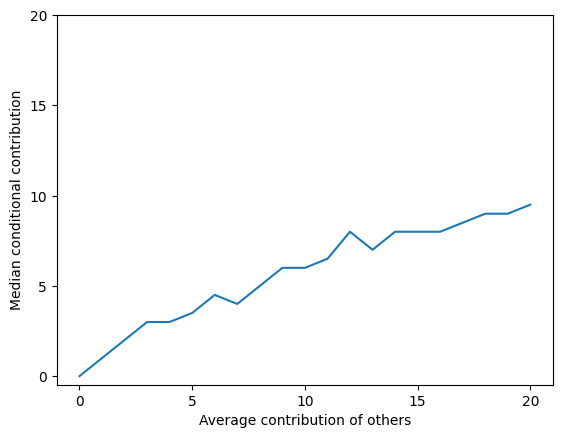

In [16]:
plt.plot(med_strat.index, med_strat['linear'])
plt.xlabel("Average contribution of others")
plt.xticks([0, 5, 10, 15, 20])
plt.ylabel("Median conditional contribution")
plt.yticks([0, 5, 10, 15, 20])

### Question 4d

The "one-for-one matching" strategy isn't something we get from the data; we have to synthesise it ourselves.  We can add to our `med_strat` dataframe a new column, which captures the strategy.  Because our `DataFrame` corresponds to levels of `c` from 0 to 20, the simplest way is to add `range(21)` as the new variable.

In [17]:
med_strat = med_strat.assign(one_for_one=range(21))
med_strat

,linear,one_for_one
c,,
0,0.0,0
1,1.0,1
2,2.0,2
3,3.0,3
4,3.0,4
5,3.5,5
6,4.5,6
7,4.0,7
8,5.0,8


Once we have `one_for_one` so defined, it's straightforward to do the plot.  Again here for best professional results, we add `label` to each of the data series we plot, and make sure to turn on the legend via `legend()`.  Bootiful!

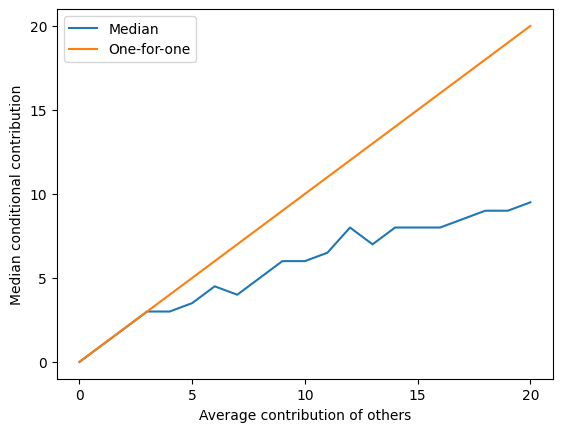

In [18]:
plt.plot(med_strat.index, med_strat['linear'], label="Median")
plt.plot(med_strat.index, med_strat['one_for_one'], label="One-for-one")
plt.xlabel("Average contribution of others")
plt.xticks([0, 5, 10, 15, 20])
plt.ylabel("Median conditional contribution")
plt.yticks([0, 5, 10, 15, 20])
plt.legend()

### Question 5a

What we need to do here is to compute the total contributions `ucomp` for players numbered 1 through 3 in each group:

1.  Remove the rows corresponding to player 4 in each group.
2.  Group by each group, and sum the values of `ucomp` for the remaining players.  Here, we need to note that `group` is unique only within the session and not unique globally - so we must group by both `sessionid` and `group`.  (Yes, the dataset does not follow a consistent convention - participants have a globally unique identifier but groups do not!  This is a reality you often need to deal with when working with data and so you always should check to understand how identifiers are coded.)

In [19]:
others = (
    df.query("numberingroup != 4")
    .groupby(['sessionid', 'group'])[['ucomp']].sum()
)
others

ucomp
sessionid   group       
160412_1143 1         24
            2         25
            3         29
            4         26
            5         39
160425_1139 1          9
            2         28
            3         31
            4         28
            5         40
160425_1354 1         48
            2         29
            3         35
160428_1441 1         46
            2         32
            3         27
            4          9
            5         28
160505_1026 1         17
            2         39
            3         42
            4         20
160505_1253 1          9
            2         39
            3         18
            4         15
            5         25
160516_1039 1         23
            2         30
            3         50
            4         37
            5         35
160516_1238 1         45
            2         28
            3         20
            4         34
            5         30

### Question 5b

The idea is that it is equally likely that you could be matched with any of the rows from the `DataFrame` of the answer to Question 5a.  In order to figure out the best response, you need to imagine, for each contribution between 0 and 20, what your payoff would be in each of those contingencies (rows).

There are a number of ways you might attack this problem.  Here's one way: to our `DataFrame` we will add one column for each of those possible contribution levels, and in that column we'll compute the payoff to making that contribution level against each of the other groups.

We need to take into account that money only comes in pounds and pence - so we round to two decimal places.

Note that although this is a maximisation problem, there is something of a <span style="color: red;">red herring</span> here.  The set of choices you have is discrete.  Therefore, you can't use `scipy.optimize.minimize`, or anything based on taking derivatives of the payoff function - because those assume your choice variable is continuous.

In [20]:
for own_c in range(21):
    others = others.assign(**{
        f'contrib_{own_c}': lambda x: ((1.34-.02/3*x['ucomp'])*(20-own_c) - .03*(20-own_c)*(20-own_c) + 0.4*(x['ucomp']+own_c)).round(2)
    })
others

ucomp  contrib_0  contrib_1  contrib_2  contrib_3  \
sessionid   group                                                      
160412_1143 1         24      21.20      21.59      21.92      22.19   
            2         25      21.47      21.86      22.20      22.48   
            3         29      22.53      22.96      23.32      23.62   
            4         26      21.73      22.14      22.48      22.76   
            5         39      25.20      25.69      26.12      26.49   
160425_1139 1          9      17.20      17.49      17.72      17.89   
            2         28      22.27      22.68      23.04      23.34   
            3         31      23.07      23.50      23.88      24.20   
            4         28      22.27      22.68      23.04      23.34   
            5         40      25.47      25.96      26.40      26.78   
160425_1354 1         48      27.60      28.15      28.64      29.07   
            2         29      22.53      22.96      23.32      23.62   
            3         35      24.13      24.60      25.00      25.34   
160428_1441 1         46      27.07      27.60      28.08      28.50   
            2         32      23.33      23.78      24.16      24.48   
            3         27      22.00      22.41      22.76      23.05   
            4          9      17.20      17.49      17.72      17.89   
            5         28      22.27      22.68      23.04      23.34   
160505_1026 1         17      19.33      19.68      19.96      20.18   
            2         39      25.20      25.69      26.12      26.49   
            3         42      26.00      26.51      26.96      27.35   
            4         20      20.13      20.50      20.80      21.04   
160505_1253 1          9      17.20      17.49      17.72      17.89   
            2         39      25.20      25.69      26.12      26.49   
            3         18      19.60      19.95      20.24      20.47   
            4         15      18.80      19.13      19.40      19.61   
            5         25      21.47      21.86      22.20      22.48   
160516_1039 1         23      20.93      21.32      21.64      21.90   
            2         30      22.80      23.23      23.60      23.91   
            3         50      28.13      28.70      29.20      29.64   
            4         37      24.67      25.14      25.56      25.92   
            5         35      24.13      24.60      25.00      25.34   
160516_1238 1         45      26.80      27.33      27.80      28.21   
            2         28      22.27      22.68      23.04      23.34   
            3         20      20.13      20.50      20.80      21.04   
            4         34      23.87      24.32      24.72      25.06   
            5         30      22.80      23.23      23.60      23.91   

                   contrib_4  contrib_5  contrib_6  contrib_7  contrib_8  ...  \
sessionid   group                                                         ...   
160412_1143 1          22.40      22.55      22.64      22.67      22.64  ...   
            2          22.69      22.85      22.95      22.98      22.96  ...   
            3          23.87      24.05      24.17      24.24      24.24  ...   
            4          22.99      23.15      23.25      23.30      23.28  ...   
            5          26.80      27.05      27.24      27.37      27.44  ...   
160425_1139 1          18.00      18.05      18.04      17.97      17.84  ...   
            2          23.57      23.75      23.87      23.92      23.92  ...   
            3          24.45      24.65      24.79      24.86      24.88  ...   
            4          23.57      23.75      23.87      23.92      23.92  ...   
            5          27.09      27.35      27.55      27.68      27.76  ...   
160425_1354 1          29.44      29.75      30.00      30.19      30.32  ...   
            2          23.87      24.05      24.17      24.24      24.24  ...   
            3          25.63      25.85      26.01      26.12      26.16  ..

With the data in this format, the expected payoff to contributing `x` tokens is obtained by taking the `.mean()` of column `contrib_x`.  To find the best response, we'll sort the resulting `Series` in decreasing order.  We see that a contribution of 8 is the contribution level that would maximise our expected earnings.

In [21]:
others.drop(columns='ucomp').mean().sort_values(ascending=False)

contrib_8     24.378378
contrib_7     24.372162
contrib_9     24.324595
contrib_6     24.305946
contrib_10    24.210811
contrib_5     24.179730
contrib_11    24.037027
contrib_4     23.993514
contrib_12    23.803243
contrib_3     23.747297
contrib_13    23.509459
contrib_2     23.441081
contrib_14    23.155676
contrib_1     23.074865
contrib_15    22.741892
contrib_0     22.648649
contrib_16    22.268108
contrib_17    21.734324
contrib_18    21.140541
contrib_19    20.486757
contrib_20    19.772973
dtype: float64